In [1]:
'''
Retorna una lista con las distancias ordenadas del grafico
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
'''
def get_distances(ddata):
    arr_distances =[]
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):

        arr_distances.append( int(round(d[1] , 1) )) 
        
        
    #arr_distances   =arr_distances.sort() 
    return arr_distances 

In [2]:
# creado para hierarchy_test
def plot_test( df ): 
     
    # 'num_vecinos', 'num_clusters', 'silueta', 'distancia', 'num_clusters'
    x = df.index
    
    trace1 = go.Scatter(
        x=x,
        y=df.silueta,
        name='Silueta',
        mode='lines+markers'
    )
    trace2 = go.Scatter(
        x=x,
        y=df.distancia,
        name='distancia',
        yaxis='y2',
        mode='lines+markers'
    )
    trace3 = go.Scatter(
        x=x,
        y=df.num_clusters,
        name='num_clusters',
        yaxis='y3',
        mode='lines+markers'
    ) 
    
    data = [trace1, trace2, trace3  ]
    
    layout = go.Layout(
        title='Testing',
        width=900, 
        yaxis=dict(
            title='Silueta',
            titlefont=dict(
                color='#1f77b4'
            ),
            tickfont=dict(
                color='#1f77b4'
            )
        ),
        yaxis2=dict(
            title='distancia',
            titlefont=dict(
                color='#ff7f0e'
            ),
            tickfont=dict(
                color='#ff7f0e'
            ),
            anchor='free',
            overlaying='y',
            side='left',
            position=0.15
        ),
        yaxis3=dict(
            title='num_clusters',
            titlefont=dict(
                color='#d62728'
            ),
            tickfont=dict(
                color='#d62728'
            ),
            anchor='x',
            overlaying='y',
            side='right'
        ) 
    )
    fig = go.Figure(data=data, layout=layout)
    #plot_url = py.plot(fig, filename='multiple-axes-multiple')
    return fig  

In [3]:
def single_silhouette_dendrogram(dist_matrix, Z, threshold, mode='clusters',
                                 method='single', sample_names=None):
    """Compute the average silhouette at a given threshold.

    Parameters
    ----------
    dist_matrix : array-like
        Precomputed distance matrix between points.
    Z : array-like
        Linkage matrix, results of scipy.cluster.hierarchy.linkage.
    threshold : float
        Specifies where to cut the dendrogram.
    mode : ('clusters', 'thresholds'), optional
        Choose what to visualise on the x-axis.

    Returns
    -------
    x : float
        Based on mode, it can contains the number of clusters or threshold.
    silhouette_avg : float
        The average silhouette.
    """
    cluster_labels = fcluster(Z, threshold, 'distance')
    nclusts = np.unique(cluster_labels).shape[0]
  
    try:
        silhouette_list = silhouette_samples(dist_matrix, cluster_labels,
                                             metric="precomputed")
        silhouette_avg = np.mean(silhouette_list)
        x = max(cluster_labels) if mode == 'clusters' else threshold
    except ValueError as e:
        if max(cluster_labels) == 1:
            x = 1 if mode == 'clusters' else threshold
            silhouette_avg = 0
        else:
            raise(e)

    return x, silhouette_avg

In [4]:
def hierarchy_test(ddata):
    col_silueta = []
    col_clusters = []
    col_distancia = []

    for i in list(get_distances(ddata)):
        ##test
        num_clusters , coef_s  =  single_silhouette_dendrogram( squareform(data_dist) , mergings   , i   )
        col_silueta.append(coef_s)
        col_clusters.append(num_clusters) 
        col_distancia.append(i)
  

    bench = pd.DataFrame({ 
        "silueta":col_silueta ,
        "num_clusters": col_clusters, 
        "distancia":col_distancia,
    } )  

    bench = bench.sort_values('silueta' , ascending=False ) 
    bench = bench.reset_index(drop=True)
    bench.to_csv('bench.csv', sep=';' , index=False , decimal = ',')
    return bench 

In [25]:
def ploty_scatter(  x_pos ,y_pos , title ):
    # Create a trace
    trace = go.Scatter(
        x = X[:, x_pos],   
        y = X[:, y_pos],   
        mode = 'markers', 
        marker=dict(color= labels , colorscale=colorscale ) 
    ) 
    layout = go.Layout( 
        plot_bgcolor = '#FFFFFF',
        paper_bgcolor = '#FFFFFF',
        xaxis=dict(
            title=sample.columns[x_pos] 
        ),
        yaxis=dict(
            title=sample.columns[y_pos]
        ),
        title=title
    )
    data = [trace] 
    fig = go.Figure(data = data, layout = layout)
    # Plot and embed in ipython notebook!
    #py.iplot(fig ,   filename='simple_scatter') 
    return fig

In [6]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%d" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [7]:
colorscale =[ 
            [0.0                 ,  '#cecece',], 
            [0.047619047619047616,  '#ffff00',],
            [0.09523809523809523 ,  '#fff21d',],
            [0.14285714285714285 ,  '#ffe52a',],
            [0.19047619047619047 ,  '#ffd733',],
            [0.23809523809523808 ,  '#ffca3a',],
            [0.2857142857142857  ,  '#ffbd40',],
            [0.3333333333333333  ,  '#ffad45',],
            [0.38095238095238093 ,  '#ffa049',],
            [0.42857142857142855 ,  '#ff904d',],
            [0.47619047619047616 ,  '#ff7f50',],
            [0.5238095238095237  ,  '#ff7f50',],
            [0.5714285714285714  ,  '#f47263',],
            [0.6190476190476191  ,  '#e96673',],
            [0.6666666666666667  ,  '#dd5a83',],
            [0.7142857142857144  ,  '#cf4d92',],
            [0.7619047619047621  ,  '#c040a1',],
            [0.8095238095238098  ,  '#b033af',],
            [0.8571428571428574  ,  '#9e25be',],
            [0.9047619047619051  ,  '#8615cd',],
            [0.9523809523809528  ,  '#6900db',], 
            [1                   ,  '#3d3d3d']]

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.plotly as py
import plotly.graph_objs as go 
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.metrics import davies_bouldin_score 
import hdbscan 

from scipy.cluster.hierarchy import linkage , dendrogram ,  fcluster  ,  cophenet
from sklearn.metrics import silhouette_samples  # , silhouette_score 
from scipy.spatial.distance import pdist ,  squareform


#plotly.tools.set_credentials_file(username='slotbite', api_key='GYgRt3eXz6IdiIy3k7sO')
py.plotly.tools.set_credentials_file(username='cachulooo', api_key='srvpWbqoQ27WdGO3pArx')

 
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 12)
np.set_printoptions(precision=2, suppress=True)  # suppress scientific float notation

In [9]:
# Cargando datos
df = pd.read_csv("segmentacion_clientes.csv" , delimiter=";" , decimal="," , encoding='utf-8')

In [10]:
# Eliminacion de outliers (-)
df = df[df.PRODUCT_ID > 0] 
df = df[(df.FACTURACION_PROMEDIO > 0 ) & (df.FACTURACION_PROMEDIO <= 397000 )] 
df = df[(df.SALDO_PROMEDIO > 0 ) & (df.SALDO_PROMEDIO <= 401500 )]  


## Convertimos las variables categoricas
#http://pbpython.com/categorical-encoding.html
pd.options.mode.chained_assignment = None
df["COMUNA"] = df["COMUNA"].astype('category')
df["TIPO_REPARTO"] = df["TIPO_REPARTO"].astype('category')
df["TI"] = df["TI"].astype('category')
df["TI2"] = df["TI2"].astype('category')

# luego la encodificamos 
df["TI"] = df["TI"].cat.codes
df["TI2"] = df["TI2"].cat.codes
df["COMUNA_ENC"] = df["COMUNA"].cat.codes 
df["TIPO_REPARTO"] = df["TIPO_REPARTO"].cat.codes 
df[:3]

,PRODUCT_ID,SUBSCRIPTION_ID,SUBSCRIBER_ID,COMUNA,TI,TI2,TIPO_REPARTO,QUEJAS,DAÑOS,CORTES,RECLAMOS,FACTURACION_PROMEDIO,SALDO_PROMEDIO,ROTACION_CARTERA,COMUNA_ENC
0,122551,122551,13185036,128 - San Esteban ...,0,0,0,0,0,0,0,18964.8333,33256.6667,1.753504,8
1,122581,122581,122581,128 - San Esteban ...,0,0,0,0,0,0,0,28445.7500,36605.0833,1.286793,8
2,109938,109938,3665521,145 - San Felipe ...,0,1,0,0,0,1,0,135045.4170,327823.5000,2.427488,18


# Definiendo el dataset

In [11]:
df.columns

Index(['PRODUCT_ID', 'SUBSCRIPTION_ID', 'SUBSCRIBER_ID', 'COMUNA', 'TI', 'TI2',
       'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA',
       'COMUNA_ENC'],
      dtype='object')

In [32]:
columnas=['PRODUCT_ID','SALDO_PROMEDIO', 'ROTACION_CARTERA','FACTURACION_PROMEDIO','TI', 'TI2',
          'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS','COMUNA_ENC']

In [33]:
frac= 0.02 #  
random = 42  
sample = df[columnas].sample(frac=frac , random_state=random)
  
# Rescato los id de la muetra
col_id = sample[['PRODUCT_ID']]    
sample.drop('PRODUCT_ID', inplace=True, axis=1)
      
# PARA LOS SCATTER
X = np.array( sample )
registros = sample.shape[0]
registros 

11685

In [14]:
#descomentar la primera ves
#labels = [0]
#fig = ploty_scatter( sample.SALDO_PROMEDIO , sample.ROTACION_CARTERA )
#py.iplot(fig ,   filename='scatter_hdbscan')

# Clustering jerárquico

In [35]:
''' 
Algoritmo de clustering: se calcula una matriz de distancias sobre la muetra de datos 
de esta manera se podra calcular el coeficiente de silueta para cada distancia del dendograma
Metodos : 
    ward: centroides es mas popular
    complete: distancias maximas  , pequenas desventajas junto a simple
    simple : distancias minimas 
'''
data_dist = pdist( sample ) 
mergings = linkage( data_dist , method='ward' ) # computing the linkage

# Dendrograma

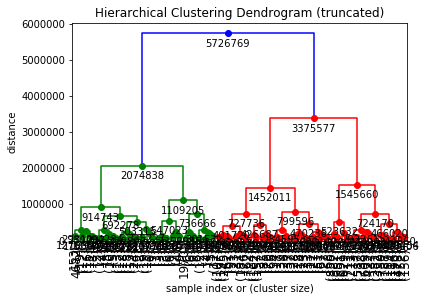

In [36]:
ddata = fancy_dendrogram(
            mergings,
            annotate_above=12,          # useful in small plots so annotations don't overlap
            truncate_mode='lastp',      # habilita p
            p=100,                      # puntos de corte para el dendrograma
            show_contracted=True,
            leaf_font_size=12.          
)
plt.show()

# Prueba de silueta

In [37]:
h_test = hierarchy_test(ddata)  
h_test

,silueta,num_clusters,distancia
0,0.831786,2,5726769
1,0.591603,4,2074838
2,0.591230,3,3375577
3,0.433972,9,799596
4,0.433972,9,736667
5,0.431797,11,727736
6,0.430347,8,914743
7,0.429577,7,1109205
8,0.429317,6,1452011
9,0.422367,5,1545660


In [20]:
py.plot(plot_test(h_test ) , filename='multiple-axes-multiple')

'https://plot.ly/~cachulooo/36'

# Punto de corte optimo

In [38]:
distancia_corte = 1875388 
labels = fcluster( mergings , distancia_corte , criterion='distance') 
num_clusters , coef_s  =  single_silhouette_dendrogram(squareform(data_dist),mergings,distancia_corte)

In [39]:
title='[Registros:'+str(registros)+']'+\
          '[Distancia de corte:' +str(distancia_corte)+']'+\
          '[Clusters:' +str(num_clusters)+']'+\
          '[Silueta:'  +str(round(coef_s , 2))+']'

In [40]:
sample.columns

Index(['SALDO_PROMEDIO', 'ROTACION_CARTERA', 'FACTURACION_PROMEDIO', 'TI',
       'TI2', 'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'COMUNA_ENC'],
      dtype='object')

In [41]:
fig = ploty_scatter( 0,1  , title )
py.iplot(fig ,   filename='scatter_hdbscan') 

In [42]:
fig = ploty_scatter(  2 , 0  , title)
py.iplot(fig ,   filename='scatter_hdbscan') 

In [58]:
#plt.title('Hierarchical Clustering Dendrogram (truncated)')
#plt.xlabel('sample index or (cluster size)')
#plt.ylabel('distance')
#ddata = dendrogram(
#    mergings,
#    truncate_mode='lastp',  # show only the last p merged clusters
#    p=12,  # show only the last p merged cluster
#    leaf_font_size=12.,
#    show_contracted=True,  # to get a distribution impression in truncated branches
#)
#plt.show()

In [28]:
sample.columns 

Index(['SALDO_PROMEDIO', 'ROTACION_CARTERA', 'FACTURACION_PROMEDIO', 'TI',
       'TI2', 'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'COMUNA_ENC'],
      dtype='object')

# Save to csv

In [45]:
def Save_csv(): 
    
    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = sample.index.values
    cluster_map['cluster'] = labels

    cluster_map = cluster_map.merge(col_id , left_on='data_index', right_on=col_id.index, how='left')[['data_index','cluster','PRODUCT_ID']]

    #cluster_map.head()

    final = cluster_map.merge(df , left_on='data_index', right_on=df.index, how='left')
    
    file = 'sample_r'+str(registros)+'_c'+str(num_clusters)+'.csv'
    try:
        final.to_csv( file , sep=";" , decimal="," , encoding='utf-8' ,   index=False  )
    except ValueError as e:
        print('Cierra el excel') 

In [46]:
Save_csv()

In [47]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = sample.index.values
cluster_map['cluster'] = labels

cluster_map = cluster_map.merge(col_id , left_on='data_index', right_on=col_id.index, how='left')[['data_index','cluster','PRODUCT_ID']]



In [48]:
cluster_map.head()

,data_index,cluster,PRODUCT_ID
0,585092,4,898866
1,574191,4,703767
2,61645,4,191047
3,369959,4,492811
4,142951,1,231522


In [52]:
final = cluster_map.merge(df , left_on='data_index', right_on=df.index, how='left') 

In [56]:

file = 'sampler'+str(registros)+'c'+str(num_clusters)+'.csv'
final.to_csv(  file , sep=";" , decimal="," , encoding='utf-8' ,   index=False  )

In [54]:
file

'sample_r11685_c4.csv'

In [ ]:
## no ejecutar 
## test culero 1 mas cercano a 1 mejor 
#c, coph_dists = cophenet(mergings, data_dist)
# 
#
### test culero 2
#last = mergings[-10:, 2] 
#last_rev = last[::-1]
#idxs = np.arange(1, len(last) + 1)
#plt.plot(idxs, last_rev)
#
#acceleration = np.diff(last, 2)  # 2nd derivative of the distances
#acceleration_rev = acceleration[::-1]
#plt.plot(idxs[:-2] + 1, acceleration_rev)
#plt.show()
#k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
#print("clusters:" , k)